In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

## 1. Load  “bank-full.csv” dataset and create a logistic regression model for predicting target variable (subscribed a term deposit or not). Use appropriate evaluation methods and report the performance of the model using appropriate metrics.

In [2]:
bank = pd.read_csv('bank-full.csv')
pd.options.display.max_columns = None
#Glimpse of Data
bank.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [3]:
df = bank.copy()

In [4]:
print('The number of rows (observations) is',df.shape[0],'\n''The number of columns (variables) is',df.shape[1])

The number of rows (observations) is 45211 
The number of columns (variables) is 17


In [5]:
df.shape

(45211, 17)

In [6]:
df.size

768587

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [9]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [10]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print(df[feature].value_counts())
        print('\n')

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64


marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64


education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64


default
no     44396
yes      815
Name: count, dtype: int64


housing
yes    25130
no     20081
Name: count, dtype: int64


loan
no     37967
yes     7244
Name: count, dtype: int64


contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64


month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: count, dtype: int64


poutcome
unknown    36959
failure 

In [11]:
for feature in df.columns: 
    if df[feature].dtype != 'object': 
        print(df[feature].value_counts())
        print('\n')

age
32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: count, Length: 77, dtype: int64


balance
 0        3514
 1         195
 2         156
 4         139
 3         134
          ... 
-381         1
 4617        1
 20584       1
 4358        1
 16353       1
Name: count, Length: 7168, dtype: int64


day
20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: count, dtype: int64


duration
124     188
90      184
89      177
104     175
122     175
       ... 
1833      1
1545      1
1352      1
1342      1
1556      1
Name: count, Length: 1573, dtype: int64


campaign
1     17544
2     12505
3      5521
4      3522
5      

In [12]:
df.isin(['#','$','@','*','.','/','&','!']).sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [13]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(df.shape)

Number of duplicate rows = 0
(45211, 17)


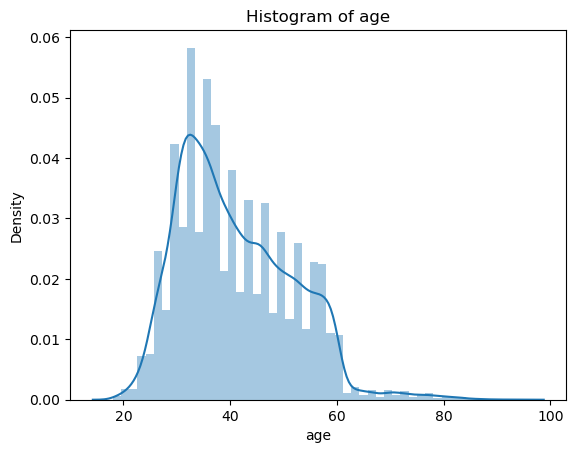

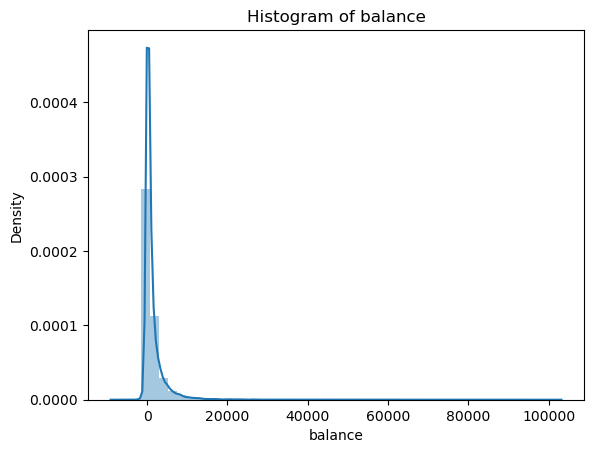

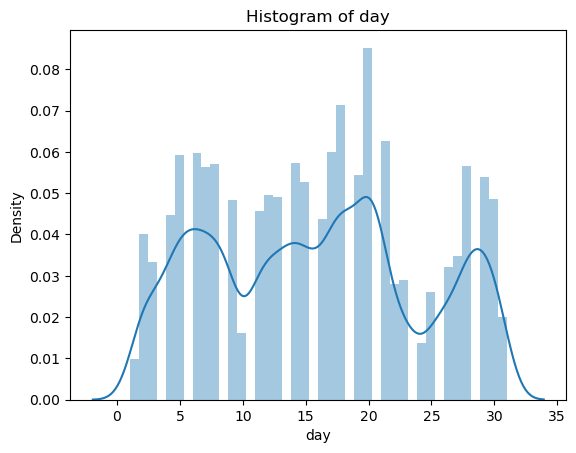

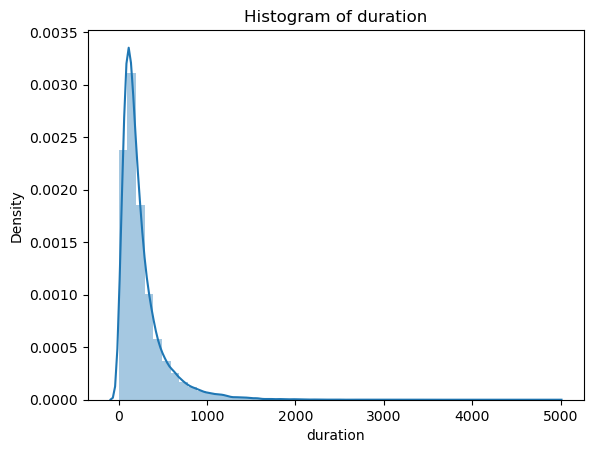

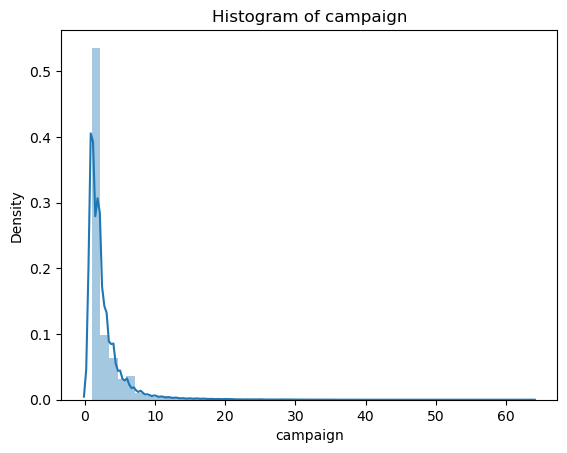

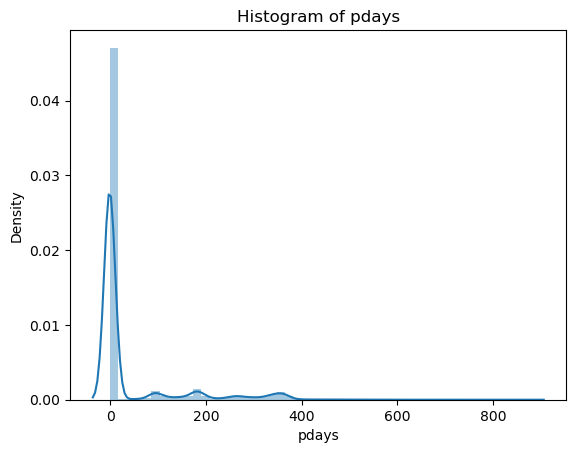

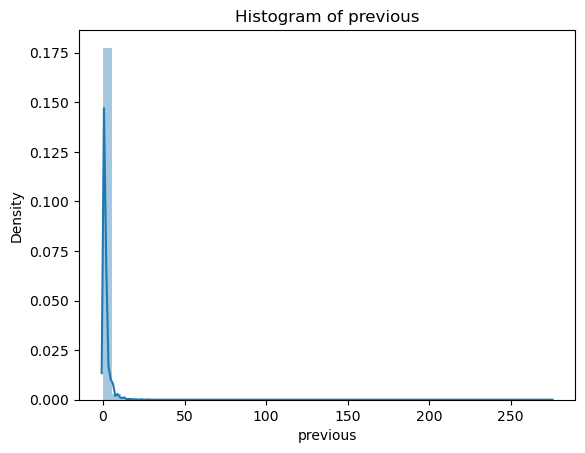

In [14]:
# Loop through all numerical variables
for col in df.select_dtypes(include=["float64", "int64"]):
    # Create a histogram
    sns.distplot(df[col])
    plt.title(f"Histogram of {col}")
    plt.show()

In [15]:
# Assuming 'df' is your dataframe containing the variables
numerical = []
categorical = []

# Identify numerical and categorical variables
for column in df:
    if pd.api.types.is_numeric_dtype(df[column]):
        numerical.append(column)
    elif pd.api.types.is_string_dtype(df[column]):
        categorical.append(column)

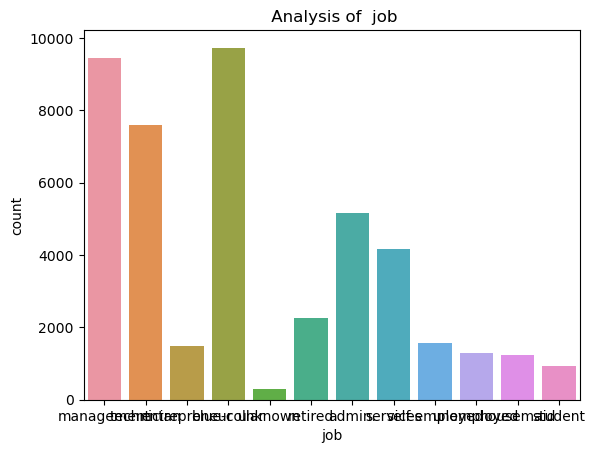

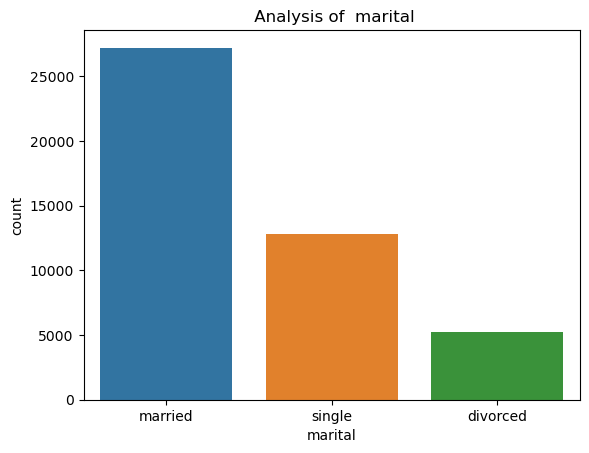

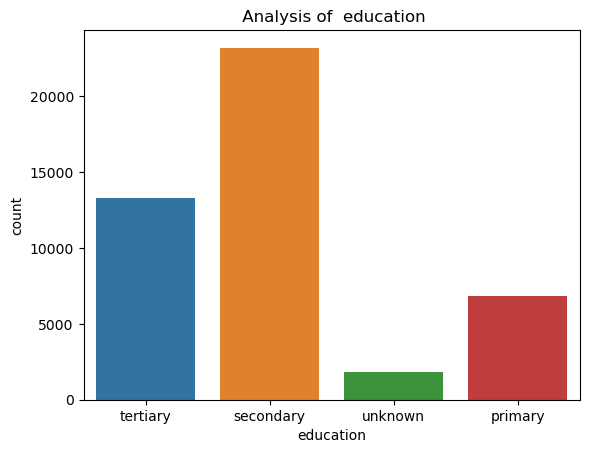

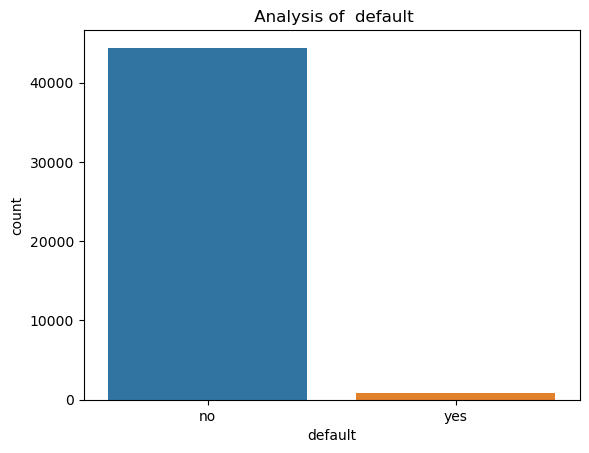

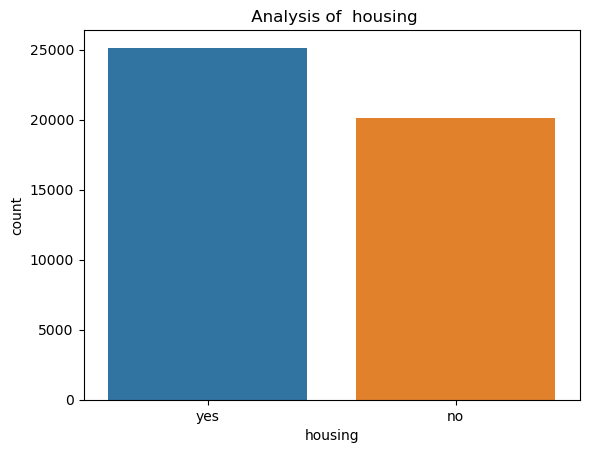

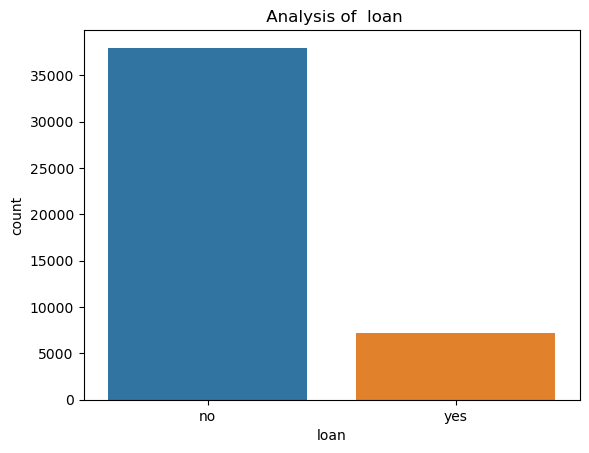

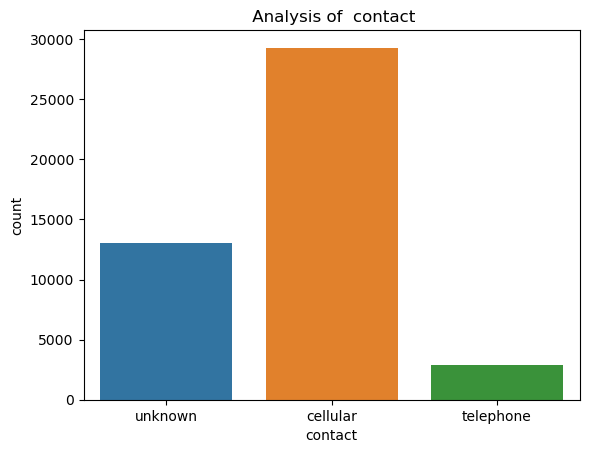

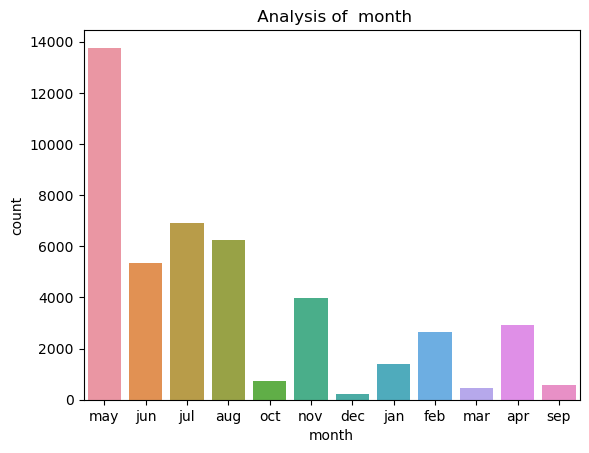

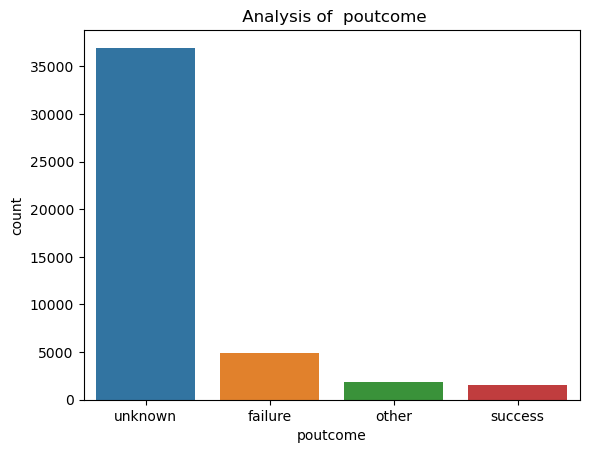

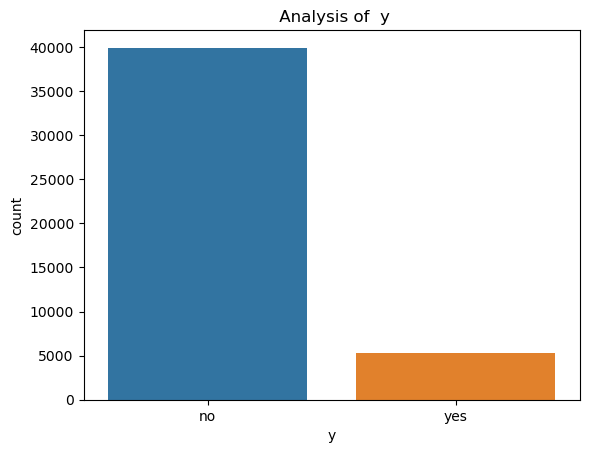

In [16]:
# Loop through all categorical variables
# Plot bivariate analysis for two categorical variables
for cat in categorical:
    plt.title(f' Analysis of  {cat}')
    sns.countplot(data=df, x=cat)
    plt.show()

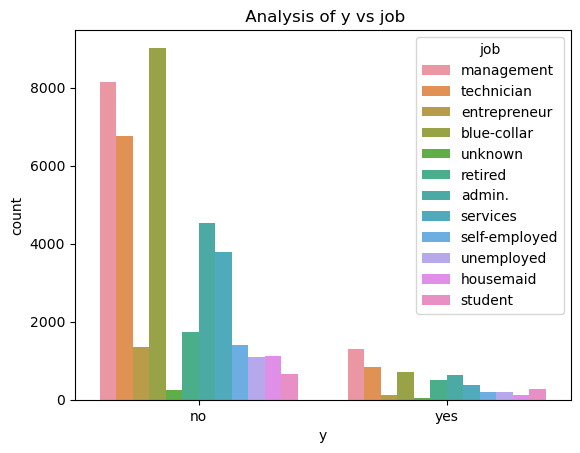

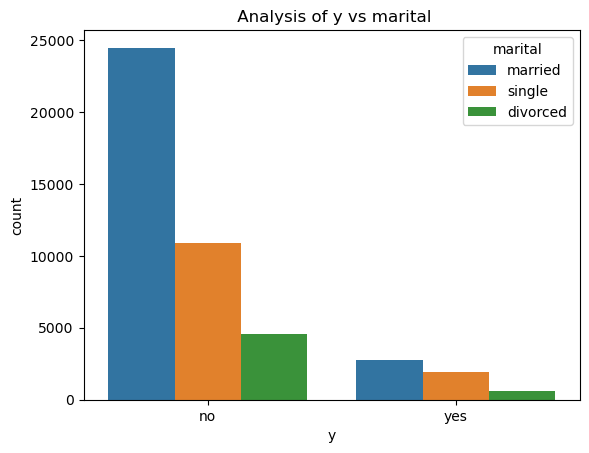

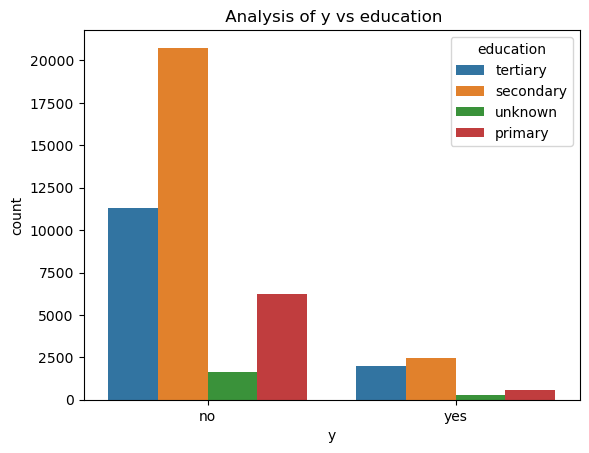

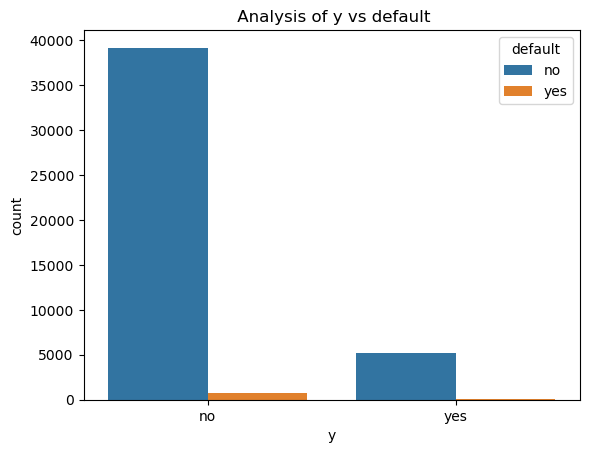

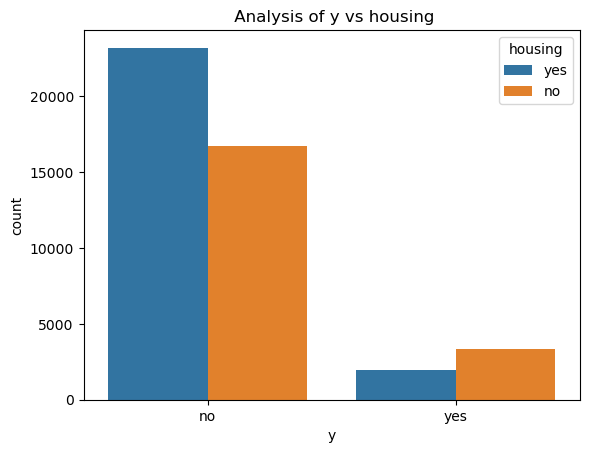

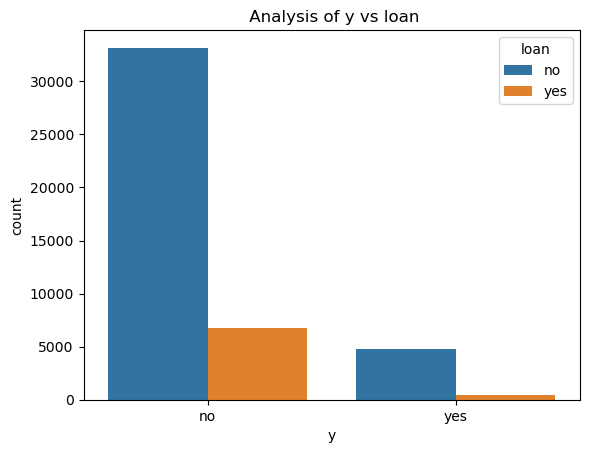

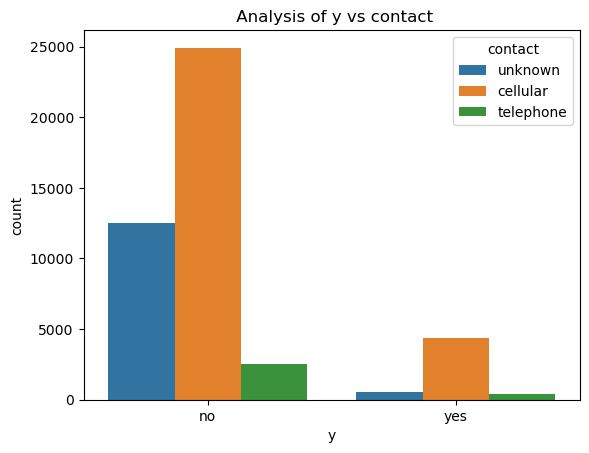

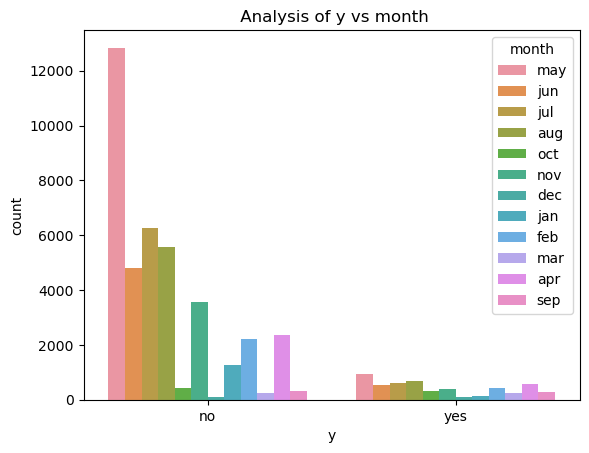

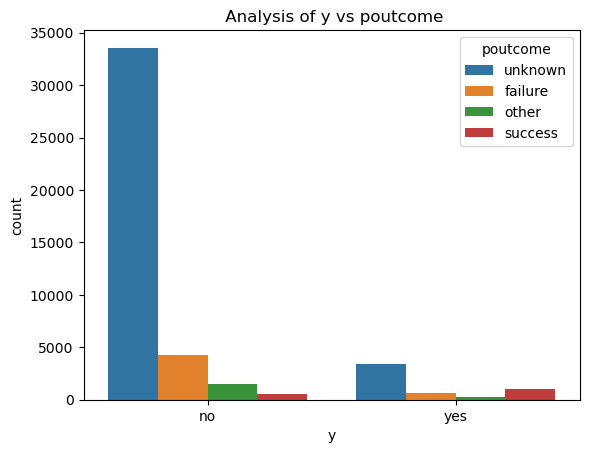

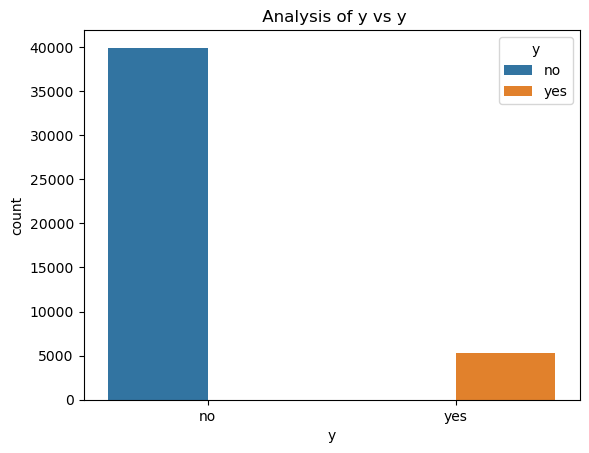

In [17]:
# Plot bivariate analysis for two categorical variables
for cat in categorical:
    plt.title(f' Analysis of y vs {cat}')
    sns.countplot(data=df, x='y', hue=cat)
    plt.show()

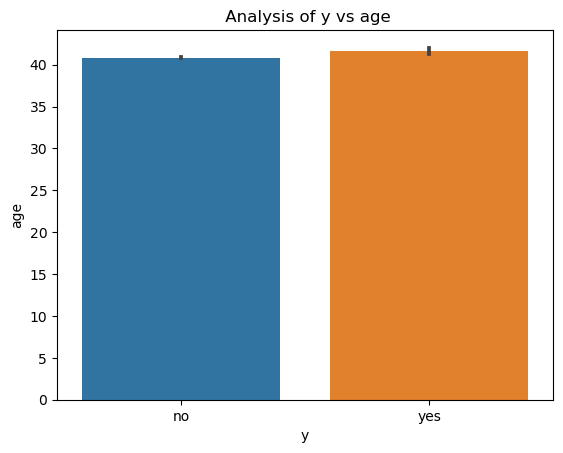

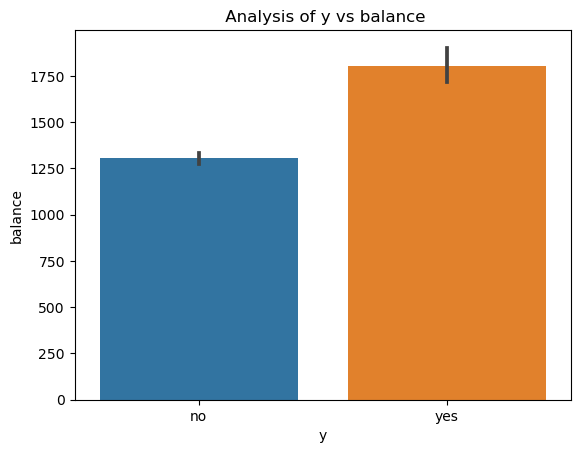

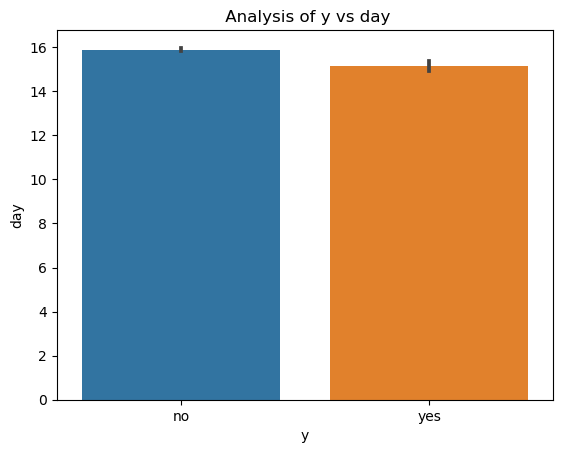

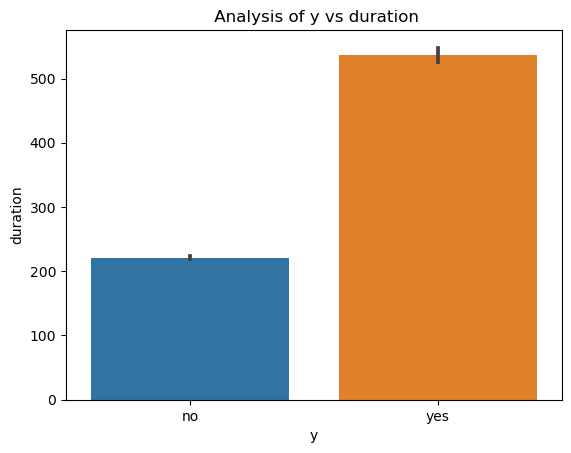

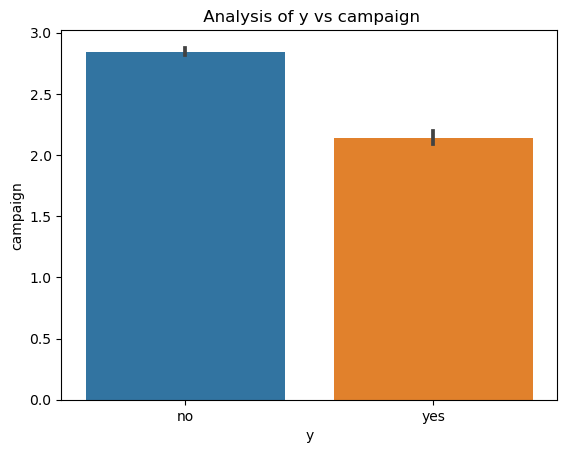

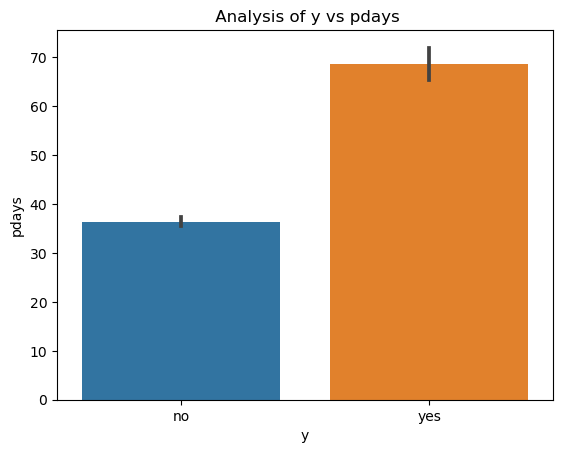

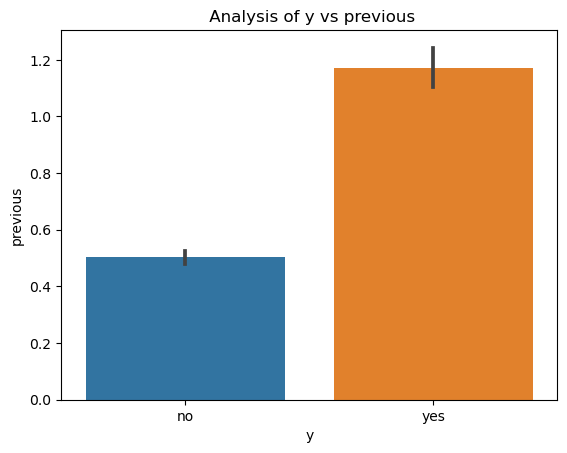

In [18]:
# Plot bivariate analysis for numerical vs Categorical variables
for num in numerical:
    plt.title(f' Analysis of y vs {num}')
    #sns.set(font_scale=1.5)
    sns.barplot(data=df, x='y', y=num)
    #sns.stripplot(x = 'y', y = num, data = df, jitter = True)
    plt.show()


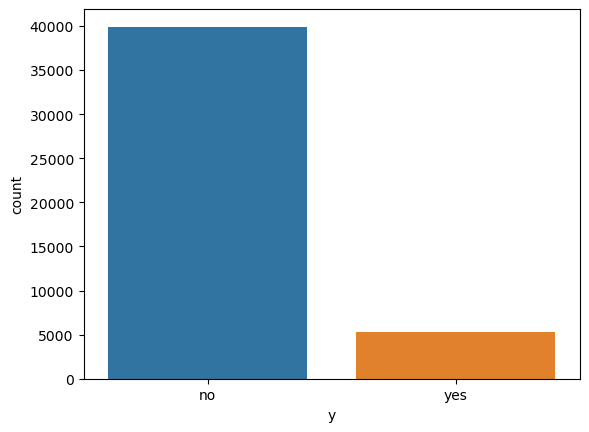

In [19]:
sns.countplot(data=df,x = df['y'])
plt.show()

In [20]:
df['y'].value_counts(normalize = True)

y
no     0.883015
yes    0.116985
Name: proportion, dtype: float64

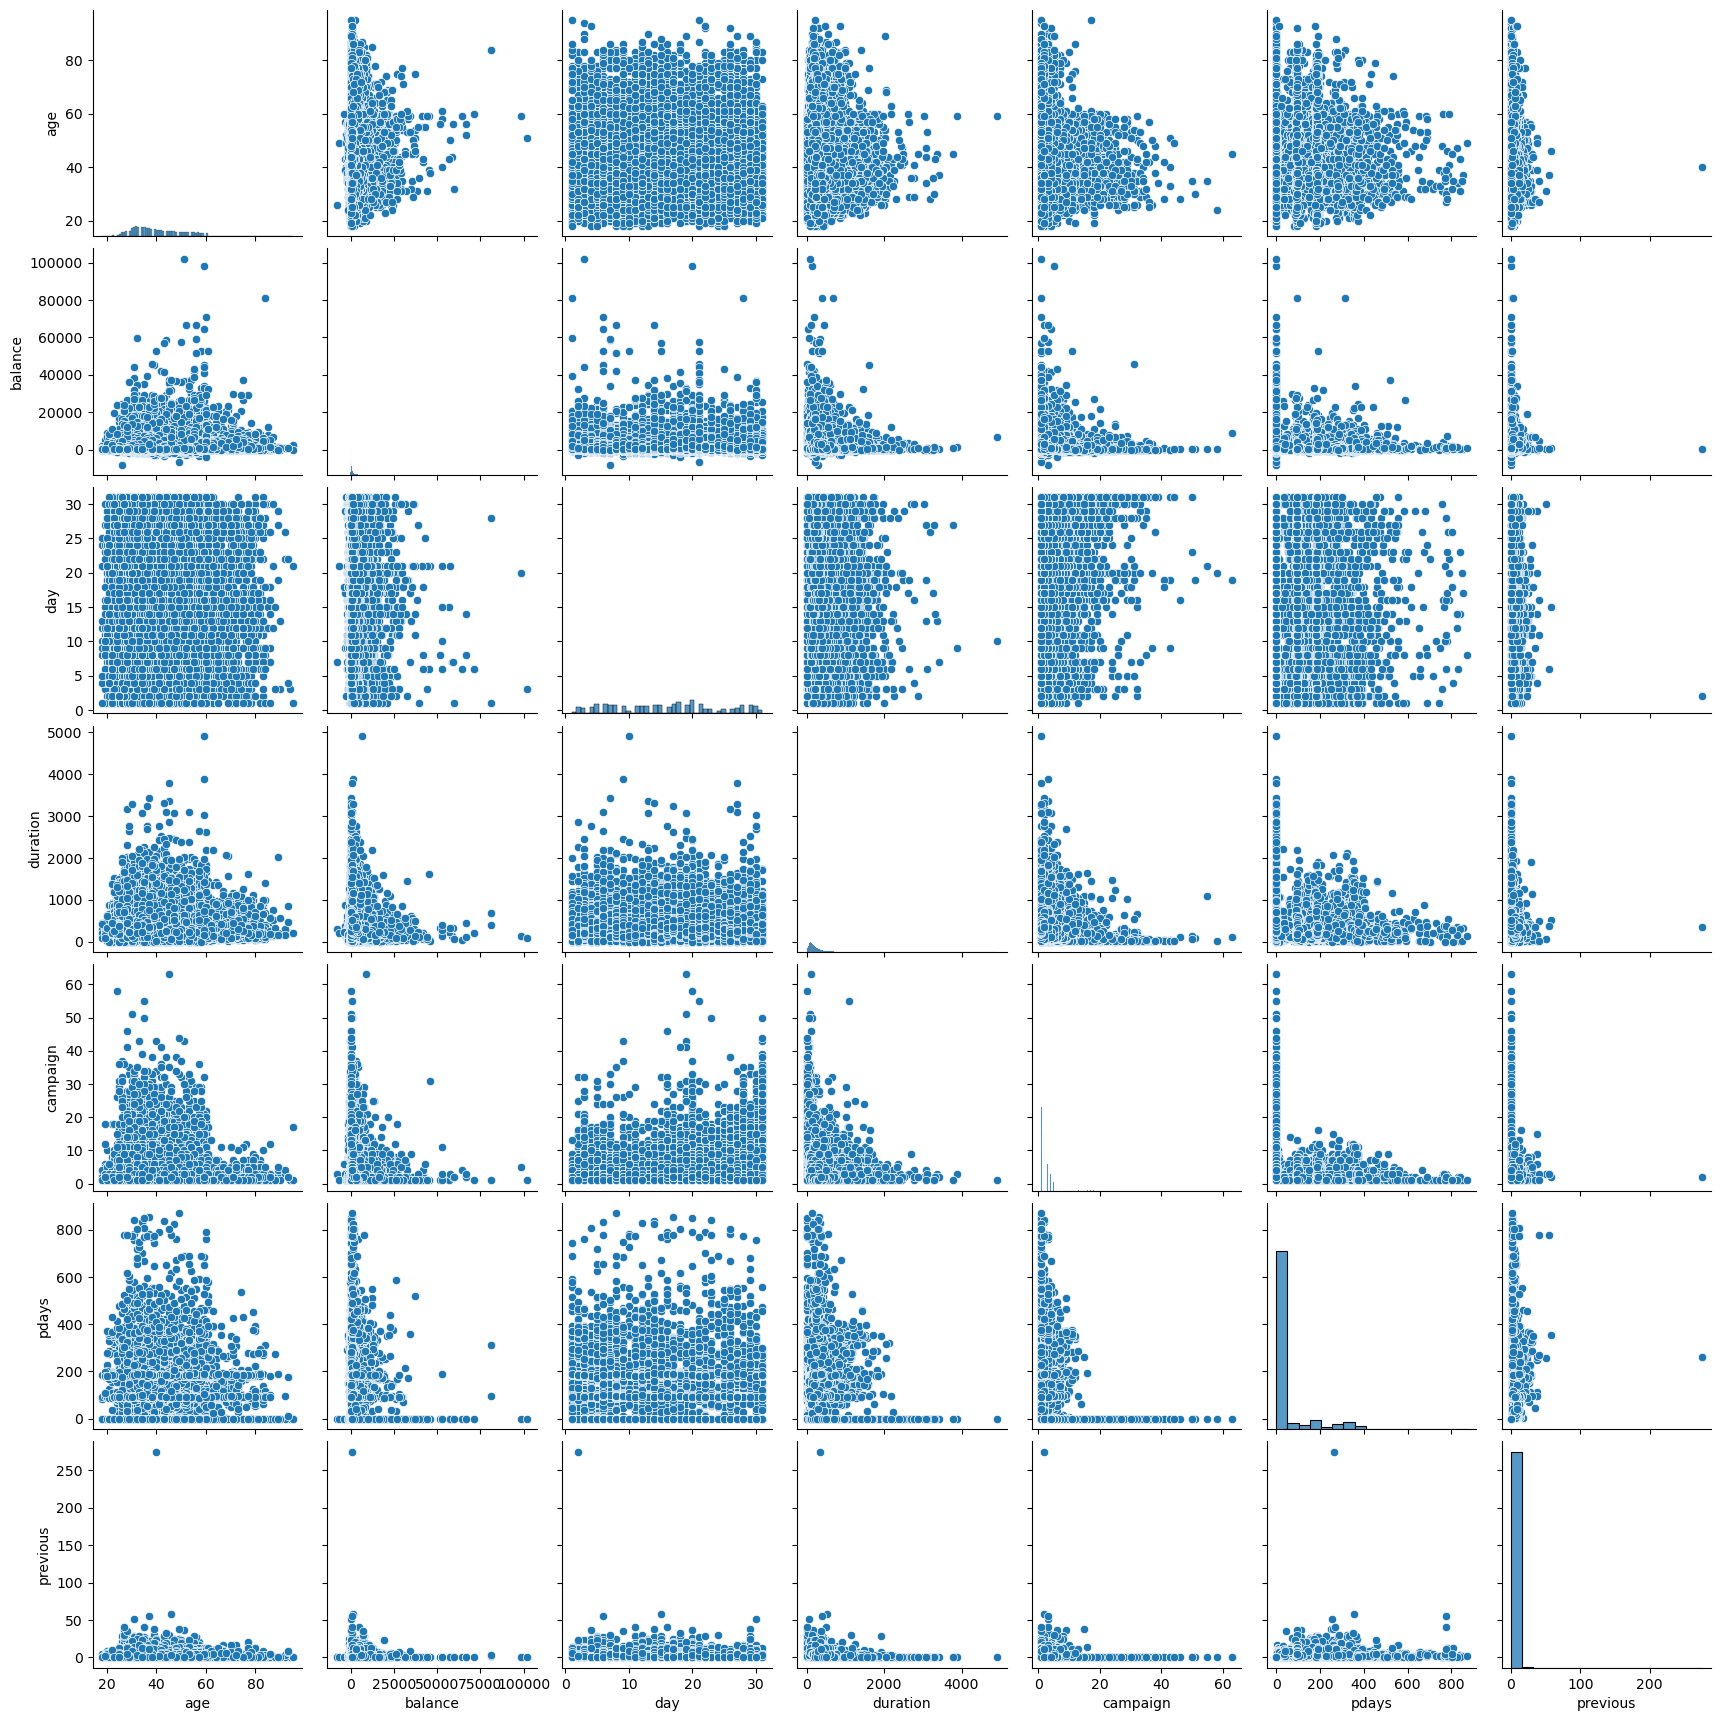

In [21]:
sns.pairplot(data=df);

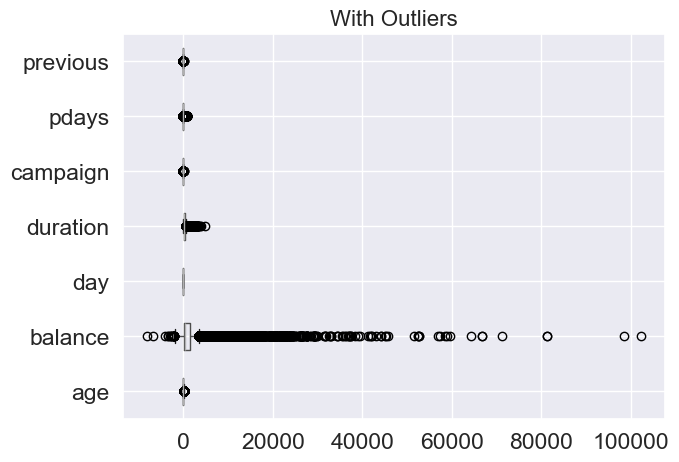

In [22]:
# construct box plot for continuous variables
cont=df.dtypes[(df.dtypes!='object') & (df.dtypes!='bool')].index
plt.figure(figsize=(7,5))
sns.set(font_scale=1.5)
df[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

In [23]:
#Treating the outliers.
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [24]:
## This is a loop to treat outliers for all the non-'object' type varible
for column in df.columns:
        if df[column].dtype != 'object':
            lr,ur=remove_outlier(df[column])
            df[column]=np.where(df[column]>ur,ur,df[column])
            df[column]=np.where(df[column]<lr,lr,df[column])

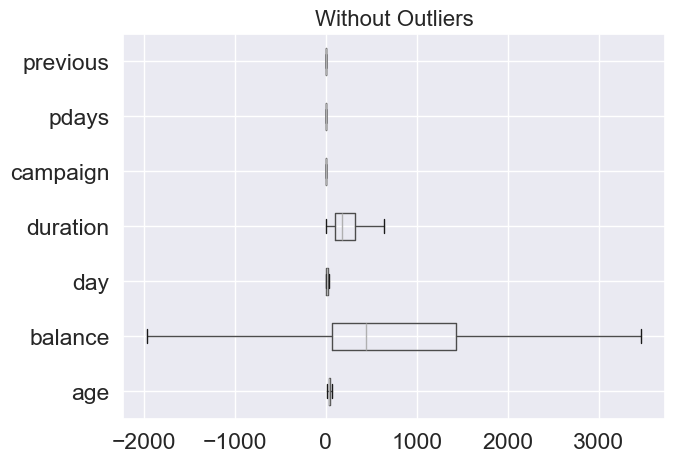

In [25]:
# construct box plot for continuous variables
cont=df.dtypes[(df.dtypes!='object') & (df.dtypes!='bool')].index
plt.figure(figsize=(7,5))
sns.set(font_scale=1.5)
df[cont].boxplot(vert=0)
plt.title('Without Outliers',fontsize=16)
plt.show()

In [26]:
df.drop(['month'],axis= 1,inplace = True)

#### label encoding

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for cat in df.select_dtypes(include = ['object']).columns:
    df[cat] = le.fit_transform(df[cat])
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,y
0,58.0,4,1,2,0,2143.0,1,0,2,5.0,261.0,1.0,-1.0,0.0,3,0
1,44.0,9,2,1,0,29.0,1,0,2,5.0,151.0,1.0,-1.0,0.0,3,0
2,33.0,2,1,1,0,2.0,1,1,2,5.0,76.0,1.0,-1.0,0.0,3,0
3,47.0,1,1,3,0,1506.0,1,0,2,5.0,92.0,1.0,-1.0,0.0,3,0
4,33.0,11,2,3,0,1.0,0,0,2,5.0,198.0,1.0,-1.0,0.0,3,0


In [28]:
for feature in df.columns: 
    if df[feature].dtype != 'object': 
        print(df[feature].value_counts())
        print('\n')

age
32.0    2085
31.0    1996
33.0    1972
34.0    1930
35.0    1894
36.0    1806
30.0    1757
37.0    1696
39.0    1487
38.0    1466
40.0    1355
41.0    1291
42.0    1242
45.0    1216
29.0    1185
46.0    1175
43.0    1161
44.0    1136
47.0    1088
28.0    1038
48.0     997
49.0     994
50.0     939
51.0     936
52.0     911
27.0     909
53.0     891
57.0     828
54.0     811
55.0     806
26.0     805
56.0     778
59.0     770
58.0     740
60.0     596
25.0     527
70.5     487
24.0     302
23.0     202
61.0     147
22.0     129
62.0      80
21.0      79
63.0      77
64.0      74
70.0      67
66.0      63
65.0      59
67.0      54
20.0      50
69.0      44
68.0      36
19.0      35
18.0      12
Name: count, dtype: int64


job
1     9732
4     9458
9     7597
0     5171
7     4154
5     2264
6     1579
2     1487
10    1303
3     1240
8      938
11     288
Name: count, dtype: int64


marital
1    27214
2    12790
0     5207
Name: count, dtype: int64


education
1    23202
2    13301
0

In [29]:
df.drop(['pdays','previous','day'],axis = 1,inplace = True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45211 non-null  float64
 1   job        45211 non-null  int32  
 2   marital    45211 non-null  int32  
 3   education  45211 non-null  int32  
 4   default    45211 non-null  int32  
 5   balance    45211 non-null  float64
 6   housing    45211 non-null  int32  
 7   loan       45211 non-null  int32  
 8   contact    45211 non-null  int32  
 9   duration   45211 non-null  float64
 10  campaign   45211 non-null  float64
 11  poutcome   45211 non-null  int32  
 12  y          45211 non-null  int32  
dtypes: float64(4), int32(9)
memory usage: 2.9 MB


#### splitting data into (75:25) for training and testing

In [31]:
from sklearn.model_selection import train_test_split,GridSearchCV

X = df.drop(['y'], axis=1)
y = df['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)


In [32]:
X_train.shape

(33908, 12)

In [33]:
y_train.shape

(33908,)

In [34]:
X_test.shape

(11303, 12)

In [35]:
y_test.shape

(11303,)

#### scaling

In [36]:
#Standardization cannot be done before the partitioning,as we don't want to fit the StandardScaler on
# some observations that will later be used in the test set.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Logistic Regression model

Accuracy on training set :  0.89
[[29191   781]
 [ 3016   920]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     29972
           1       0.54      0.23      0.33      3936

    accuracy                           0.89     33908
   macro avg       0.72      0.60      0.63     33908
weighted avg       0.86      0.89      0.87     33908

Accuracy on testing set :  0.88
[[9663  287]
 [1037  316]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      9950
           1       0.52      0.23      0.32      1353

    accuracy                           0.88     11303
   macro avg       0.71      0.60      0.63     11303
weighted avg       0.86      0.88      0.86     11303



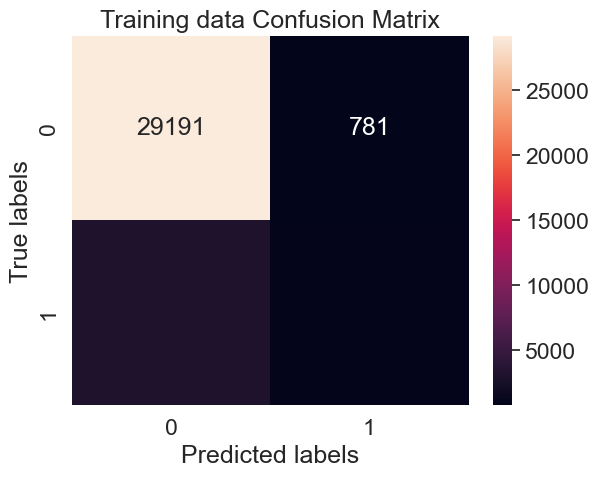

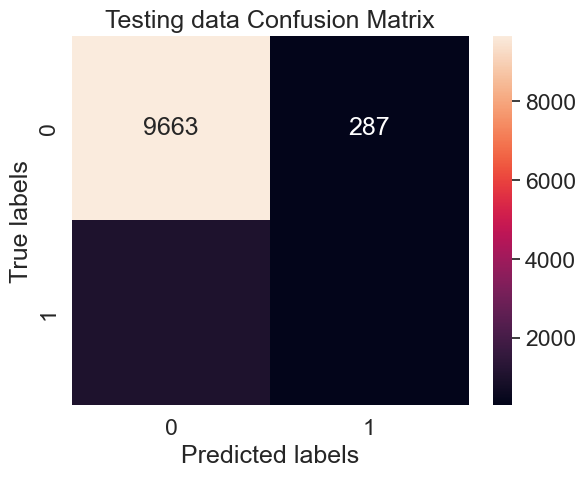

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Fit the Logistic Regression model
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
## Performance Matrix on train data set
y_train_predict_lr = lr.predict(X_train)
print("Accuracy on training set : ",round(lr.score(X_train, y_train),2))

print(metrics.confusion_matrix(y_train, y_train_predict_lr))
print(metrics.classification_report(y_train, y_train_predict_lr))
## Performance Matrix on test data set
y_test_predict_lr = lr.predict(X_test)
print("Accuracy on testing set : ",round(lr.score(X_test, y_test),2))

print(metrics.confusion_matrix(y_test, y_test_predict_lr))
print(metrics.classification_report(y_test, y_test_predict_lr))
# Example confusion matrix (replace with your actual values)
lr_trainconf =metrics.confusion_matrix(y_train, y_train_predict_lr)
# Plot the confusion matrix
ax = plt.subplot()
sns.heatmap(lr_trainconf, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Training data Confusion Matrix')
plt.show()
# Example confusion matrix (replace with your actual values)
lr_testconf =metrics.confusion_matrix(y_test, y_test_predict_lr)
# Plot the confusion matrix
ax = plt.subplot()
sns.heatmap(lr_testconf, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Testing data Confusion Matrix')
plt.show()


AUC: 0.869
AUC: 0.868


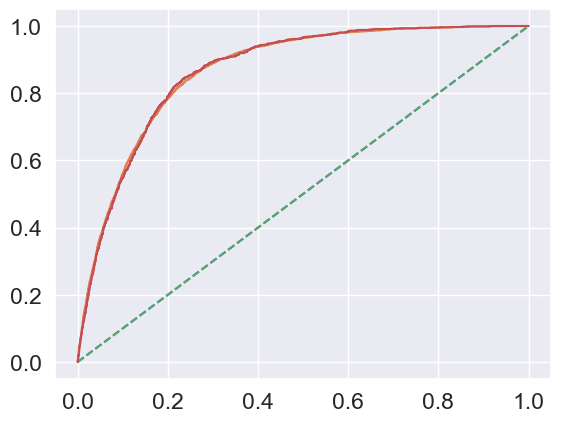

In [38]:
#AUC AND ROC GRAPH FOR TRAIN DATA
# predict probabilities
probs = lr.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
#AUC AND ROC GRAPH FOR TEST DATA
# predict probabilities
probs = lr.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

##  2. Have you used any hyperparameter tuning while building the model in Q1? If yes, then plot the performances that were obtained at different steps of optimisation. Otherwise, create an optimised model and compare performance with Q1.

### Logistic Regression model tuning

Accuracy on training set :  0.89
[[29191   781]
 [ 3017   919]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     29972
           1       0.54      0.23      0.33      3936

    accuracy                           0.89     33908
   macro avg       0.72      0.60      0.63     33908
weighted avg       0.86      0.89      0.87     33908

Accuracy on testing set :  0.88
[[9663  287]
 [1037  316]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      9950
           1       0.52      0.23      0.32      1353

    accuracy                           0.88     11303
   macro avg       0.71      0.60      0.63     11303
weighted avg       0.86      0.88      0.86     11303



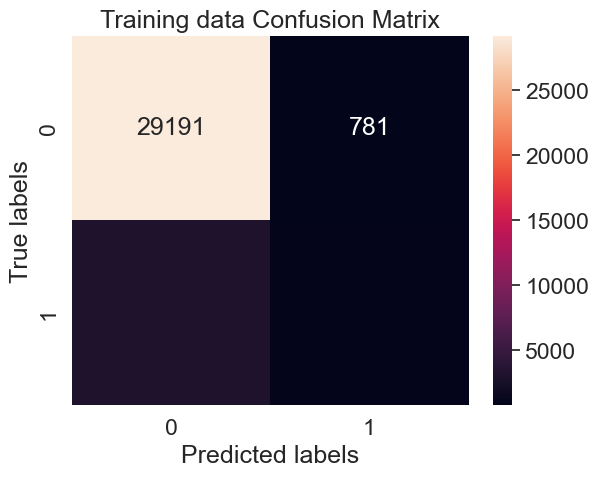

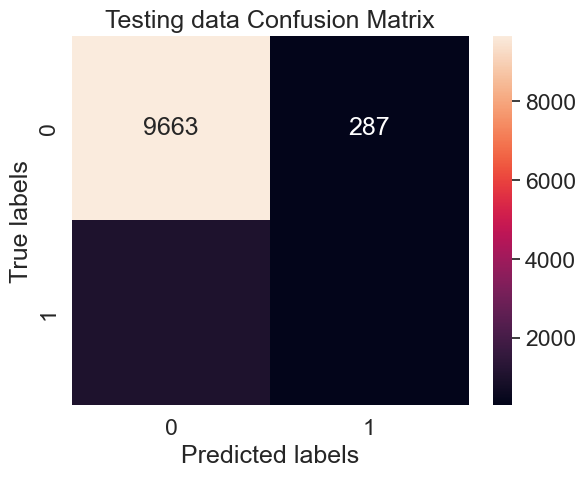

In [64]:
# Fit the Logistic Regression model
#lr = LogisticRegression(solver='liblinear',max_iter=10000,penalty='l1',verbose=0,l1_ratio=1,multi_class='ovr',n_jobs=1,random_state=42)
lr_tune = LogisticRegression(solver='saga',max_iter=10000,penalty='elasticnet',verbose=0,l1_ratio=1,n_jobs=1,random_state=42)
lr_tune.fit(X_train, y_train)
## Performance Matrix on train data set
y_train_predict_lr_tune = lr_tune.predict(X_train)
print("Accuracy on training set : ",round(lr_tune.score(X_train, y_train),2))
print(metrics.confusion_matrix(y_train, y_train_predict_lr_tune))
print(metrics.classification_report(y_train, y_train_predict_lr_tune))
## Performance Matrix on test data set
y_test_predict_lr_tune = lr_tune.predict(X_test)
print("Accuracy on testing set : ",round(lr_tune.score(X_test, y_test),2))
print(metrics.confusion_matrix(y_test, y_test_predict_lr_tune))
print(metrics.classification_report(y_test, y_test_predict_lr_tune))
# Example confusion matrix (replace with your actual values)
lr_tune_trainconf =metrics.confusion_matrix(y_train, y_train_predict_lr_tune)
# Plot the confusion matrix
ax = plt.subplot()
sns.heatmap(lr_tune_trainconf, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Training data Confusion Matrix')
plt.show()
# Example confusion matrix (replace with your actual values)
lr_tune_testconf =metrics.confusion_matrix(y_test, y_test_predict_lr_tune)
# Plot the confusion matrix
ax = plt.subplot()
sns.heatmap(lr_tune_testconf, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Testing data Confusion Matrix')
plt.show()


AUC: 0.869
AUC: 0.868


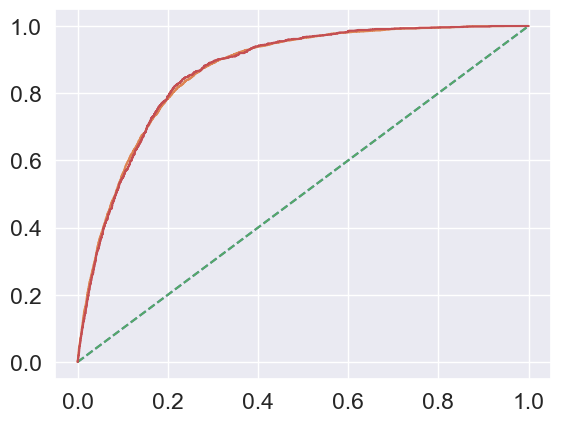

In [65]:
#AUC AND ROC GRAPH FOR TRAIN DATA
# predict probabilities
probs = lr_tune.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
#AUC AND ROC GRAPH FOR TEST DATA
# predict probabilities
probs = lr_tune.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### Applying GridSearchCV for Logistic Regression

In [41]:
lr_grid={'penalty':['l1', 'l2', 'elasticnet', None],
      'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
      'tol':[0.0001,0.00001,0.001,0.01]}
lr_cv_model = LogisticRegression(max_iter=10000,n_jobs=2)
lr_grid_search = GridSearchCV(estimator = lr_cv_model, param_grid = lr_grid, cv = 5,n_jobs=-2,scoring='f1')
lr_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-2,
             param_grid={'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga'],
                         'tol': [0.0001, 1e-05, 0.001, 0.01]},
             scoring='f1')

In [42]:
print(lr_grid_search.best_params_,'\n')
print(lr_grid_search.best_estimator_)

{'penalty': None, 'solver': 'sag', 'tol': 0.01} 

LogisticRegression(max_iter=10000, n_jobs=2, penalty=None, solver='sag',
                   tol=0.01)


In [43]:
lr_best_model = lr_grid_search.best_estimator_

Accuracy on training set :  0.89
[[29193   779]
 [ 3021   915]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     29972
           1       0.54      0.23      0.33      3936

    accuracy                           0.89     33908
   macro avg       0.72      0.60      0.63     33908
weighted avg       0.86      0.89      0.87     33908

Accuracy on testing set :  0.88
[[9662  288]
 [1037  316]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      9950
           1       0.52      0.23      0.32      1353

    accuracy                           0.88     11303
   macro avg       0.71      0.60      0.63     11303
weighted avg       0.86      0.88      0.86     11303



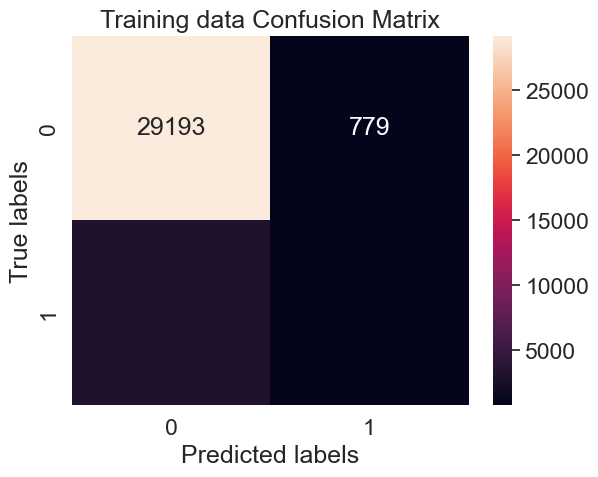

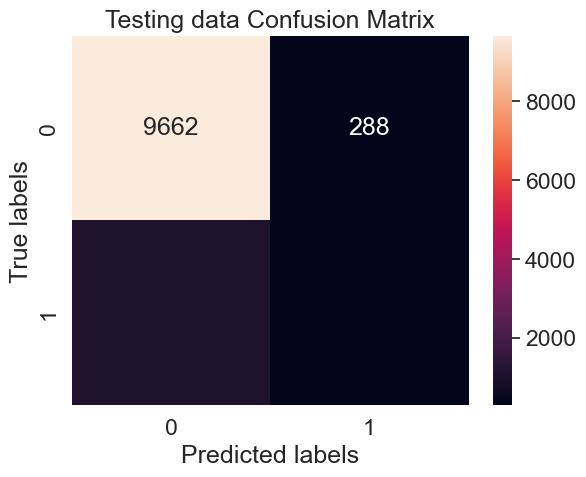

In [44]:
## Performance Matrix on train data set
y_train_predict_lr_gsm = lr_best_model.predict(X_train)
print("Accuracy on training set : ",round(lr_best_model.score(X_train, y_train),2))
print(metrics.confusion_matrix(y_train, y_train_predict_lr_gsm))
print(metrics.classification_report(y_train, y_train_predict_lr_gsm))
## Performance Matrix on test data set
y_test_predict_lr_gsm = lr_best_model.predict(X_test)
print("Accuracy on testing set : ",round(lr_best_model.score(X_test, y_test),2))
print(metrics.confusion_matrix(y_test, y_test_predict_lr_gsm))
print(metrics.classification_report(y_test, y_test_predict_lr_gsm))

# Example confusion matrix (replace with your actual values)
lr_gsm_trainconf =metrics.confusion_matrix(y_train, y_train_predict_lr_gsm)
# Plot the confusion matrix
ax = plt.subplot()
sns.heatmap(lr_gsm_trainconf, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Training data Confusion Matrix')
plt.show()
# Example confusion matrix (replace with your actual values)
lr_gsm_testconf =metrics.confusion_matrix(y_test, y_test_predict_lr_gsm)
# Plot the confusion matrix
ax = plt.subplot()
sns.heatmap(lr_gsm_testconf, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Testing data Confusion Matrix')
plt.show()



AUC: 0.869
AUC: 0.868


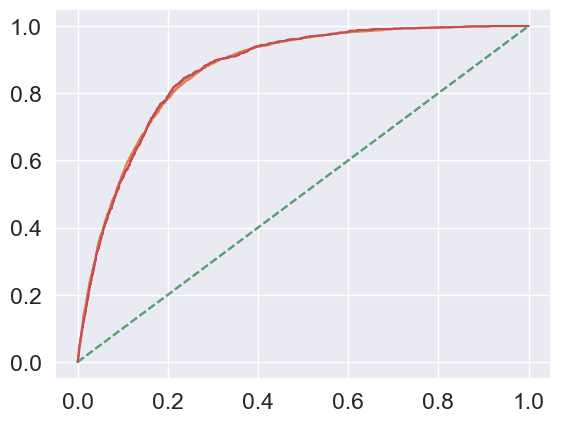

In [45]:
#AUC AND ROC GRAPH FOR TRAIN DATA
# predict probabilities
probs = lr_best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
#AUC AND ROC GRAPH FOR TEST DATA
# predict probabilities
probs = lr_best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

### SMOTE Logistic Regression

Accuracy on training set :  0.79
[[23823  6149]
 [  833  3103]]
              precision    recall  f1-score   support

           0       0.97      0.79      0.87     29972
           1       0.34      0.79      0.47      3936

    accuracy                           0.79     33908
   macro avg       0.65      0.79      0.67     33908
weighted avg       0.89      0.79      0.83     33908

AUC: 0.868


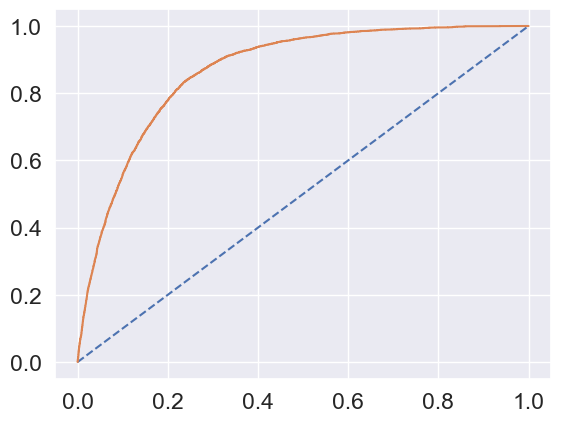

In [46]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

Lrsmote = LogisticRegression()
Lrsmote.fit(X_train_res, y_train_res)
## Performance Matrix on train data set
y_train_predict_smote = Lrsmote.predict(X_train)
print("Accuracy on training set : ",round(Lrsmote.score(X_train, y_train),2))
print(metrics.confusion_matrix(y_train, y_train_predict_smote))
print(metrics.classification_report(y_train, y_train_predict_smote))
#AUC AND ROC GRAPH FOR TRAIN DATA
# predict probabilities
probs = Lrsmote.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### LR smote grcv

Accuracy on training set :  0.79
[[23823  6149]
 [  833  3103]]
              precision    recall  f1-score   support

           0       0.97      0.79      0.87     29972
           1       0.34      0.79      0.47      3936

    accuracy                           0.79     33908
   macro avg       0.65      0.79      0.67     33908
weighted avg       0.89      0.79      0.83     33908

AUC: 0.868


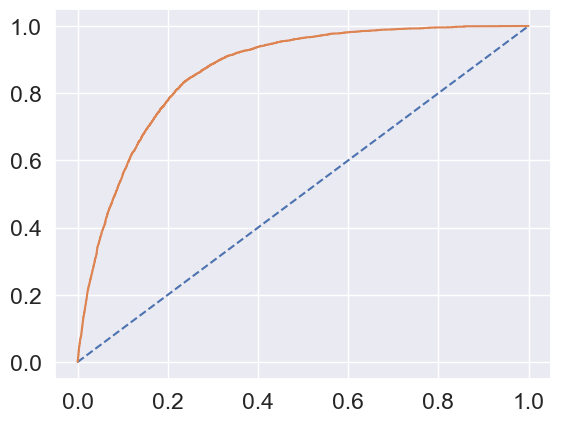

In [47]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

Lrsmote = LogisticRegression(C=10,penalty='l2')
Lrsmote.fit(X_train_res, y_train_res)  
## Performance Matrix on train data set
Lrsmote_y_train_predict = Lrsmote.predict(X_train)
print("Accuracy on training set : ",round(Lrsmote.score(X_train, y_train),2))
print(metrics.confusion_matrix(y_train, Lrsmote_y_train_predict))
print(metrics.classification_report(y_train, Lrsmote_y_train_predict))
#AUC AND ROC GRAPH FOR TRAIN DATA
# predict probabilities
probs = Lrsmote.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### logistic regression model performance report

In [71]:

model_performance = {'model_name': ['Logistic Regression model','Logistic Regression model tuning','GridSearchCV for Logistic Regression',
                                    'SMOTE Logistic Regression','LR smote grcv'],
    'Training Accuracy':['89','89','89','79','79'],
    'Testing Accuracy':['88','88','88','0','0'],
    'Training AUC':['86.9','86.9','86.9','86.8','86.8'],
    'Testing AUC':['86.8','86.8','86.8','0','0'],
    'add':['0','0','0','0','0']}


In [72]:
All_models = pd.DataFrame(model_performance)
All_models.sort_values(by='Testing Accuracy')

,model_name,Training Accuracy,Testing Accuracy,Training AUC,Testing AUC,add
3,SMOTE Logistic Regression,79,0,86.8,0,0
4,LR smote grcv,79,0,86.8,0,0
0,Logistic Regression model,89,88,86.9,86.8,0
1,Logistic Regression model tuning,89,88,86.9,86.8,0
2,GridSearchCV for Logistic Regression,89,88,86.9,86.8,0


##  3. Create two ensemble ML models for predicting the target variable using the evaluation setting that you have used in Q1 and report the performance.

### Random Forest Classifier

Training Accuracy :  0.9999115253037631
Confusion matrix
[[29971     1]
 [    2  3934]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29972
           1       1.00      1.00      1.00      3936

    accuracy                           1.00     33908
   macro avg       1.00      1.00      1.00     33908
weighted avg       1.00      1.00      1.00     33908

Testing Accuracy :  0.8950721047509511
Confusion matrix
[[9622  328]
 [ 858  495]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      9950
           1       0.60      0.37      0.45      1353

    accuracy                           0.90     11303
   macro avg       0.76      0.67      0.70     11303
weighted avg       0.88      0.90      0.88     11303



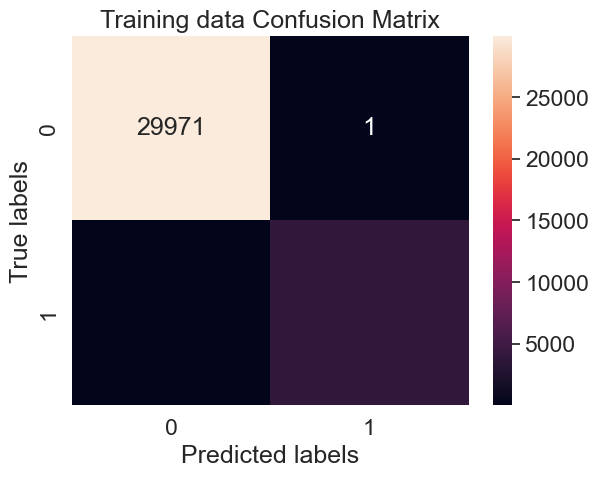

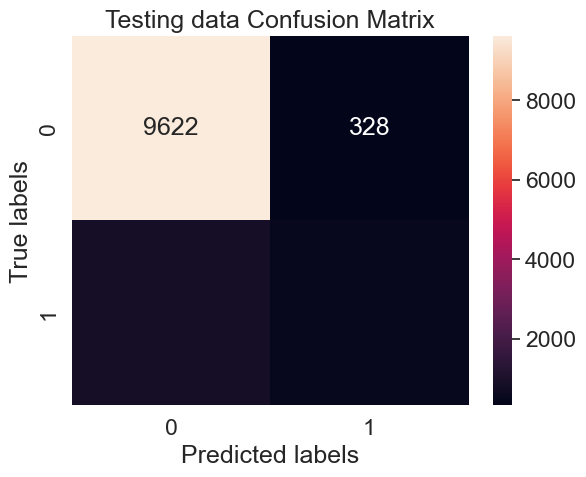

In [48]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=1)  # You can adjust hyperparameters
rf_model.fit(X_train, y_train)

## Performance Matrix on train data set
rf_model_ytrain_pred = rf_model.predict(X_train)
rf_model_score = rf_model.score(X_train, y_train) ## Accuracy
print("Training Accuracy : ",rf_model_score)
print("Confusion matrix")
print(metrics.confusion_matrix(y_train, rf_model_ytrain_pred))  ## confusion_matrix
print(metrics.classification_report(y_train, rf_model_ytrain_pred))## classification_report
## Performance Matrix on test data set
rf_model_ytest_pred = rf_model.predict(X_test)
rf_model_score = rf_model.score(X_test, y_test)
print("Testing Accuracy : ",rf_model_score)
print("Confusion matrix")
print(metrics.confusion_matrix(y_test, rf_model_ytest_pred))
print(metrics.classification_report(y_test, rf_model_ytest_pred))
# Example confusion matrix (replace with your actual values)
rf_model_trainconf =metrics.confusion_matrix(y_train, rf_model_ytrain_pred)
# Plot the confusion matrix
ax = plt.subplot()
sns.heatmap(rf_model_trainconf, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Training data Confusion Matrix')
plt.show()
# Example confusion matrix (replace with your actual values)
rf_model_testconf =metrics.confusion_matrix(y_test, rf_model_ytest_pred)
# Plot the confusion matrix
ax = plt.subplot()
sns.heatmap(rf_model_testconf, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Testing data Confusion Matrix')
plt.show()


AUC: 1.000
AUC: 0.890


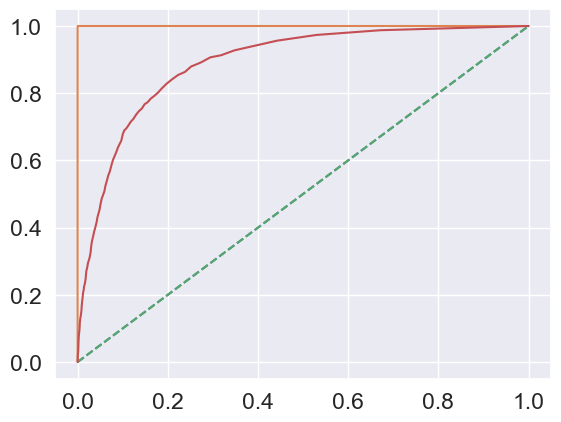

In [49]:
#AUC AND ROC GRAPH FOR TRAIN DATA
# predict probabilities
probs = rf_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
#AUC AND ROC GRAPH FOR TEST DATA
# predict probabilities
probs = rf_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### Tuning Random Forest

Training Accuracy :  0.8891117140497817
Confusion matrix
[[29911    61]
 [ 3699   237]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     29972
           1       0.80      0.06      0.11      3936

    accuracy                           0.89     33908
   macro avg       0.84      0.53      0.53     33908
weighted avg       0.88      0.89      0.84     33908

Testing Accuracy :  0.8857825356100151
Confusion matrix
[[9927   23]
 [1268   85]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      9950
           1       0.79      0.06      0.12      1353

    accuracy                           0.89     11303
   macro avg       0.84      0.53      0.53     11303
weighted avg       0.87      0.89      0.84     11303



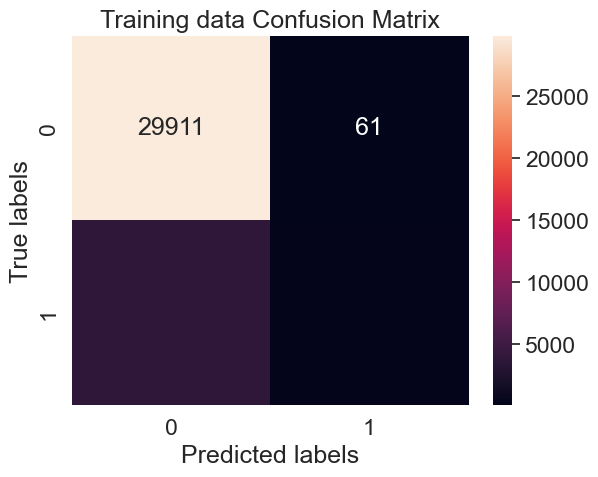

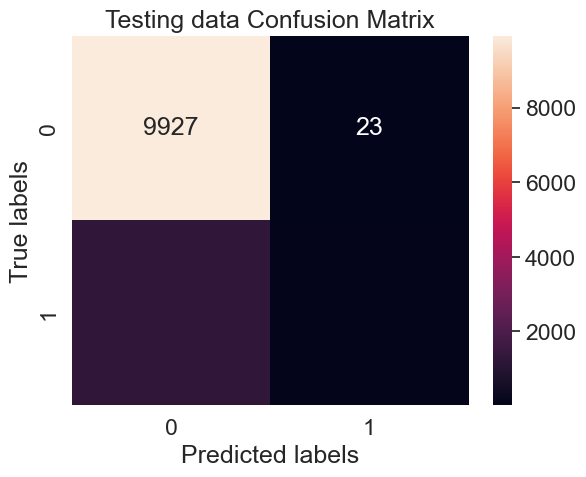

In [50]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=30,max_features=3, max_depth=5,random_state=1)

RF_model=RF_model.fit(X_train, y_train)

## Performance Matrix on train data set
RF_model_ytrain_pred = RF_model.predict(X_train)
RF_model_score = RF_model.score(X_train, y_train) ## Accuracy
print("Training Accuracy : ",RF_model_score)
print("Confusion matrix")
print(metrics.confusion_matrix(y_train, RF_model_ytrain_pred))  ## confusion_matrix
print(metrics.classification_report(y_train, RF_model_ytrain_pred))## classification_report
## Performance Matrix on test data set
RF_model_ytest_pred = RF_model.predict(X_test)
RF_model_score = RF_model.score(X_test, y_test)
print("Testing Accuracy : ",RF_model_score)
print("Confusion matrix")
print(metrics.confusion_matrix(y_test, RF_model_ytest_pred))
print(metrics.classification_report(y_test, RF_model_ytest_pred))
# Example confusion matrix (replace with your actual values)
RF_model_trainconf =metrics.confusion_matrix(y_train, RF_model_ytrain_pred)
# Plot the confusion matrix
ax = plt.subplot()
sns.heatmap(RF_model_trainconf, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Training data Confusion Matrix')
plt.show()
# Example confusion matrix (replace with your actual values)
RF_model_testconf =metrics.confusion_matrix(y_test, RF_model_ytest_pred)
# Plot the confusion matrix
ax = plt.subplot()
sns.heatmap(RF_model_testconf, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Testing data Confusion Matrix')
plt.show()


AUC: 0.895
AUC: 0.884


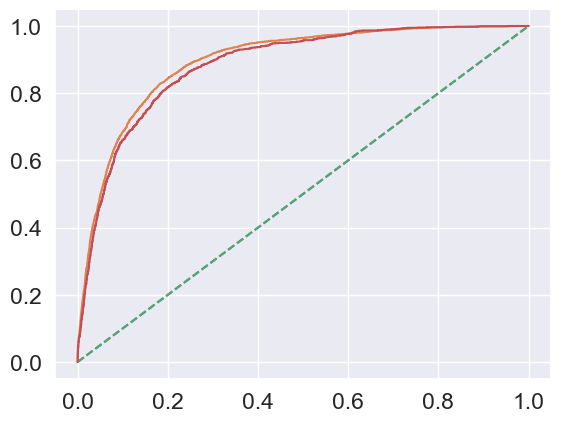

In [51]:
#AUC AND ROC GRAPH FOR TRAIN DATA
# predict probabilities
probs = RF_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
#AUC AND ROC GRAPH FOR TEST DATA
# predict probabilities
probs = RF_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### tuning Random Forest with gridsearchcv

In [52]:
# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100 ],  # Number of trees
    'max_depth': [None, 5,7,9,11,12],    # Maximum depth of each tree
    'min_samples_split': [2, 5, 10] # Minimum samples required to split a node
}

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best accuracy score:", best_score)

Best parameters: {'max_depth': 12, 'min_samples_split': 2, 'n_estimators': 50}
Best accuracy score: 0.8993749078850645


Training Accuracy :  0.9394538162085644
Confusion matrix
[[29764   208]
 [ 1845  2091]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     29972
           1       0.91      0.53      0.67      3936

    accuracy                           0.94     33908
   macro avg       0.93      0.76      0.82     33908
weighted avg       0.94      0.94      0.93     33908

Testing Accuracy :  0.8949836326638946
Confusion matrix
[[9685  265]
 [ 922  431]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      9950
           1       0.62      0.32      0.42      1353

    accuracy                           0.89     11303
   macro avg       0.77      0.65      0.68     11303
weighted avg       0.88      0.89      0.88     11303



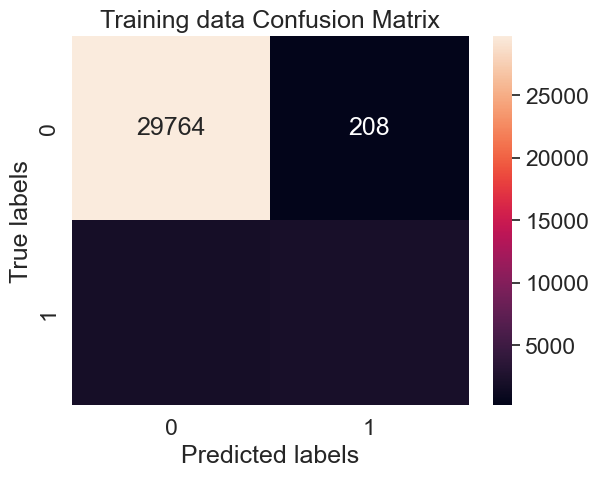

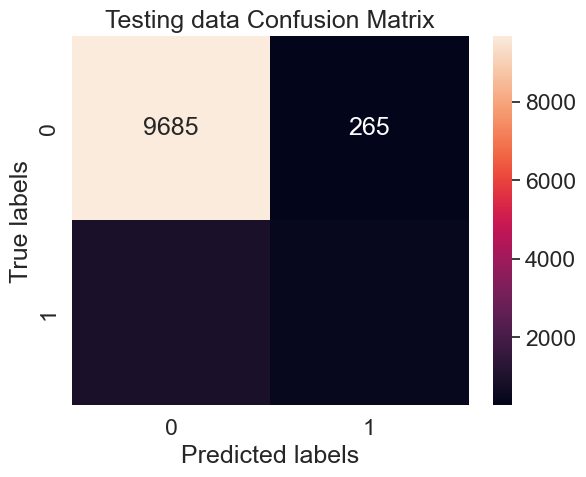

In [53]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

RFgscv_model=RandomForestClassifier(min_samples_split=2, max_depth=12, n_estimators=50)

RFgscv_model=RFgscv_model.fit(X_train, y_train)
## Performance Matrix on train data set
RFgscv_model_ytrain_pred = RFgscv_model.predict(X_train)
RFgscv_model_score = RFgscv_model.score(X_train, y_train) ## Accuracy
print("Training Accuracy : ",RFgscv_model_score)
print("Confusion matrix")
print(metrics.confusion_matrix(y_train, RFgscv_model_ytrain_pred))  ## confusion_matrix
print(metrics.classification_report(y_train, RFgscv_model_ytrain_pred))## classification_report
## Performance Matrix on test data set
RFgscv_model_ytest_pred = RFgscv_model.predict(X_test)
RFgscv_model_score = RFgscv_model.score(X_test, y_test)
print("Testing Accuracy : ",RFgscv_model_score)
print("Confusion matrix")
print(metrics.confusion_matrix(y_test, RFgscv_model_ytest_pred))
print(metrics.classification_report(y_test, RFgscv_model_ytest_pred))
# Example confusion matrix (replace with your actual values)
RFgscv_model_trainconf =metrics.confusion_matrix(y_train, RFgscv_model_ytrain_pred)
# Plot the confusion matrix
ax = plt.subplot()
sns.heatmap(RFgscv_model_trainconf, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Training data Confusion Matrix')
plt.show()
# Example confusion matrix (replace with your actual values)
RFgscv_model_testconf =metrics.confusion_matrix(y_test, RFgscv_model_ytest_pred)
# Plot the confusion matrix
ax = plt.subplot()
sns.heatmap(RFgscv_model_testconf, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Testing data Confusion Matrix')
plt.show()


AUC: 0.963
AUC: 0.898


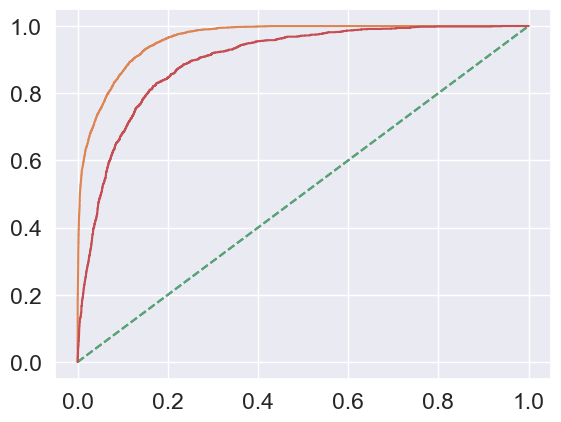

In [54]:
#AUC AND ROC GRAPH FOR TRAIN DATA
# predict probabilities
probs = RFgscv_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
#AUC AND ROC GRAPH FOR TEST DATA
# predict probabilities
probs = RFgscv_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### Random Forest with smote

Accuracy on training set :  0.91
[[26479  3493]
 [ 1671 28301]]
              precision    recall  f1-score   support

           0       0.94      0.88      0.91     29972
           1       0.89      0.94      0.92     29972

    accuracy                           0.91     59944
   macro avg       0.92      0.91      0.91     59944
weighted avg       0.92      0.91      0.91     59944

AUC: 0.976


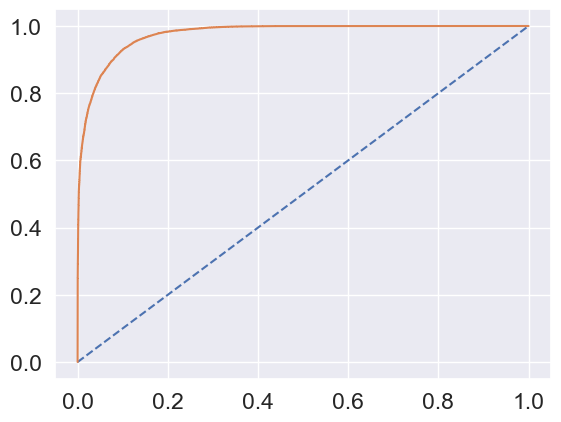

In [55]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
from sklearn.ensemble import RandomForestClassifier

rfsmote = RandomForestClassifier(min_samples_split=2, max_depth=12, n_estimators=50)
rfsmote.fit(X_train_res, y_train_res)
## Performance Matrix on train data set
rfsmote_y_train_pred = rfsmote.predict(X_train_res)
print("Accuracy on training set : ",round(rfsmote.score(X_train_res, y_train_res),2))
print(metrics.confusion_matrix(y_train_res, rfsmote_y_train_pred))
print(metrics.classification_report(y_train_res, rfsmote_y_train_pred))
#AUC AND ROC GRAPH FOR TRAIN DATA
# predict probabilities
probs = rfsmote.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### Gradients Boosting Classifier

Training Accuracy :  0.9037690220596909
Confusion matrix
[[29184   788]
 [ 2475  1461]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     29972
           1       0.65      0.37      0.47      3936

    accuracy                           0.90     33908
   macro avg       0.79      0.67      0.71     33908
weighted avg       0.89      0.90      0.89     33908

Testing Accuracy :  0.8979916836238166
Confusion matrix
[[9658  292]
 [ 861  492]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      9950
           1       0.63      0.36      0.46      1353

    accuracy                           0.90     11303
   macro avg       0.77      0.67      0.70     11303
weighted avg       0.88      0.90      0.89     11303



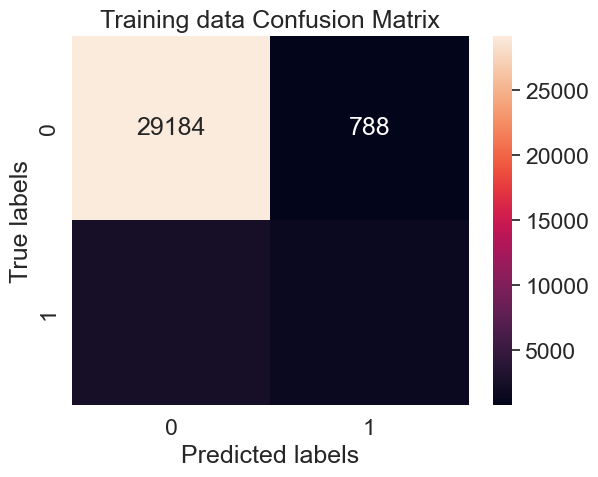

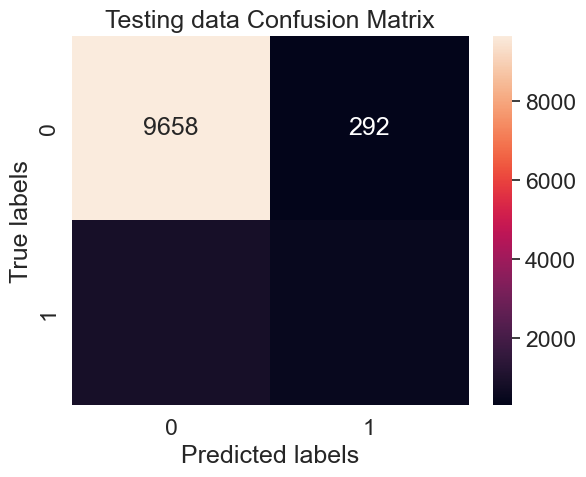

In [56]:
#Gradients Boosting
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train, y_train)
## Performance Matrix on train data set
gbcl_ypred_train = gbcl.predict(X_train)
gbcl_train_score = gbcl.score(X_train, y_train) ## Accuracy
print("Training Accuracy : ",gbcl_train_score)
print("Confusion matrix")
print(metrics.confusion_matrix(y_train, gbcl_ypred_train))  ## confusion_matrix
print(metrics.classification_report(y_train, gbcl_ypred_train))## classification_report
## Performance Matrix on test data set
gbcl_ypred_test = gbcl.predict(X_test)
gbcl_test_score = gbcl.score(X_test, y_test)
print("Testing Accuracy : ",gbcl_test_score)
print("Confusion matrix")
print(metrics.confusion_matrix(y_test, gbcl_ypred_test))
print(metrics.classification_report(y_test, gbcl_ypred_test))

# Example confusion matrix (replace with your actual values)
gbcl_trainconf =metrics.confusion_matrix(y_train, gbcl_ypred_train)
# Plot the confusion matrix
ax = plt.subplot()
sns.heatmap(gbcl_trainconf, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Training data Confusion Matrix')
plt.show()
# Example confusion matrix (replace with your actual values)
gbcl_testconf =metrics.confusion_matrix(y_test, gbcl_ypred_test)
# Plot the confusion matrix
ax = plt.subplot()
sns.heatmap(gbcl_testconf, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Testing data Confusion Matrix')
plt.show()


AUC: 0.911
AUC: 0.901


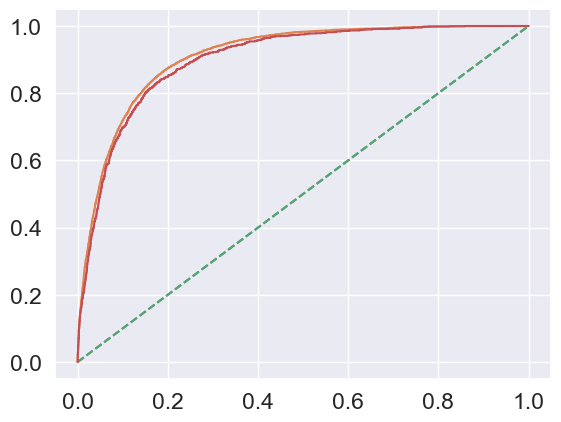

In [57]:
#AUC AND ROC GRAPH FOR TRAIN DATA
# predict probabilities
probs = gbcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
#AUC AND ROC GRAPH FOR TEST DATA
# predict probabilities
probs = gbcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### Tuning Gradient Boosting Classifier

Training Accuracy :  0.9164503951869766
Confusion matrix
[[29279   693]
 [ 2140  1796]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     29972
           1       0.72      0.46      0.56      3936

    accuracy                           0.92     33908
   macro avg       0.83      0.72      0.76     33908
weighted avg       0.91      0.92      0.91     33908

Testing Accuracy :  0.8949836326638946
Confusion matrix
[[9607  343]
 [ 844  509]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      9950
           1       0.60      0.38      0.46      1353

    accuracy                           0.89     11303
   macro avg       0.76      0.67      0.70     11303
weighted avg       0.88      0.89      0.88     11303



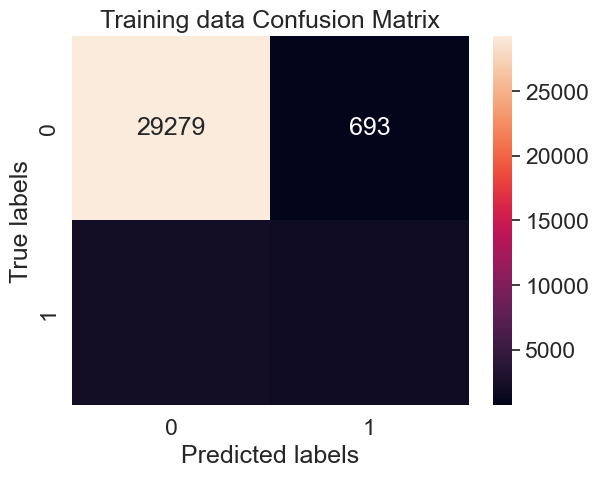

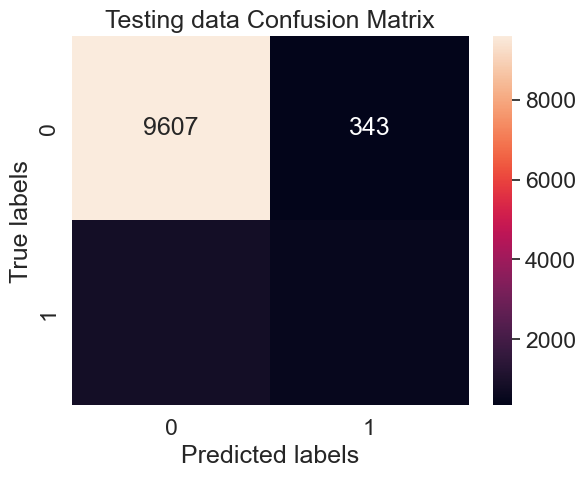

In [58]:
#Gradients Boosting
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
gbcltune = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),n_estimators=100,max_depth=5,random_state=1)
gbcltune.fit(X_train, y_train)
## Performance Matrix on train data set
gbcltune_ypred_train = gbcltune.predict(X_train)
gbcltune_train_score = gbcltune.score(X_train, y_train) ## Accuracy
print("Training Accuracy : ",gbcltune_train_score)
print("Confusion matrix")
print(metrics.confusion_matrix(y_train, gbcltune_ypred_train))  ## confusion_matrix
print(metrics.classification_report(y_train, gbcltune_ypred_train))## classification_report
## Performance Matrix on test data set
gbcltune_ypred_test = gbcltune.predict(X_test)
gbcltune_test_score = gbcltune.score(X_test, y_test)
print("Testing Accuracy : ",gbcltune_test_score)
print("Confusion matrix")
print(metrics.confusion_matrix(y_test, gbcltune_ypred_test))
print(metrics.classification_report(y_test, gbcltune_ypred_test))

# Example confusion matrix (replace with your actual values)
gbcltune_trainconf =metrics.confusion_matrix(y_train, gbcltune_ypred_train)
# Plot the confusion matrix
ax = plt.subplot()
sns.heatmap(gbcltune_trainconf, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Training data Confusion Matrix')
plt.show()
# Example confusion matrix (replace with your actual values)
gbcltune_testconf =metrics.confusion_matrix(y_test, gbcltune_ypred_test)
# Plot the confusion matrix
ax = plt.subplot()
sns.heatmap(gbcltune_testconf, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Testing data Confusion Matrix')
plt.show()


AUC: 0.929
AUC: 0.902


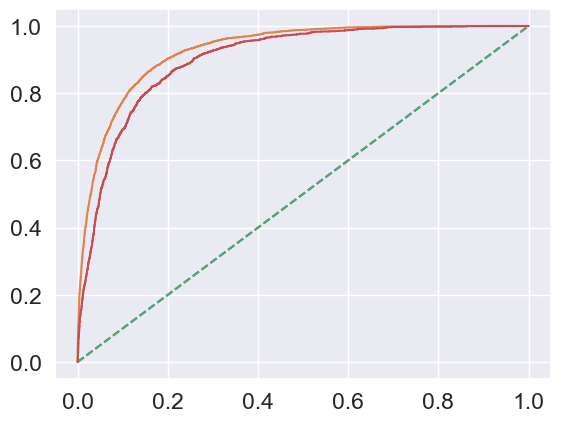

In [59]:
#AUC AND ROC GRAPH FOR TRAIN DATA
# predict probabilities
probs = gbcltune.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
#AUC AND ROC GRAPH FOR TEST DATA
# predict probabilities
probs = gbcltune.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### tuning Gradient Boosting Classifier with gridsearchcv

In [60]:
param_grid = {
    'n_estimators': [50, 100],  # Number of trees
    'learning_rate': [0.01, 0.1],  # Learning rate
    'max_depth': [5,7,9]  # Maximum depth of trees
}
gb_classifier = GradientBoostingClassifier()
grid_search = GridSearchCV(estimator=gb_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best accuracy score:", best_score)


Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}
Best accuracy score: 0.8998762001361115


Training Accuracy :  0.9099032676654477
Confusion matrix
[[29209   763]
 [ 2292  1644]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     29972
           1       0.68      0.42      0.52      3936

    accuracy                           0.91     33908
   macro avg       0.81      0.70      0.73     33908
weighted avg       0.90      0.91      0.90     33908

Testing Accuracy :  0.8963107139697426
Confusion matrix
[[9628  322]
 [ 850  503]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      9950
           1       0.61      0.37      0.46      1353

    accuracy                           0.90     11303
   macro avg       0.76      0.67      0.70     11303
weighted avg       0.88      0.90      0.89     11303



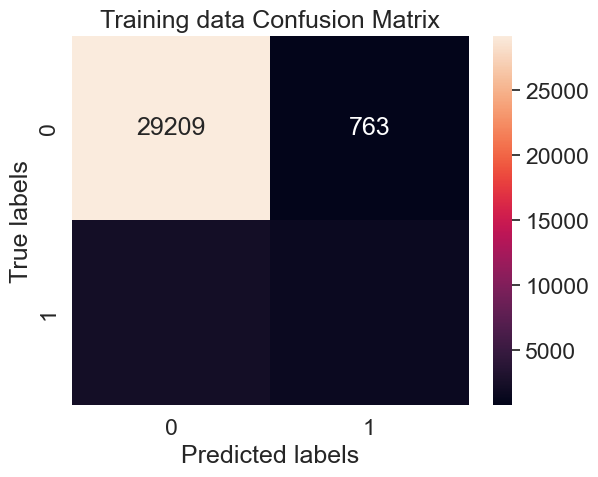

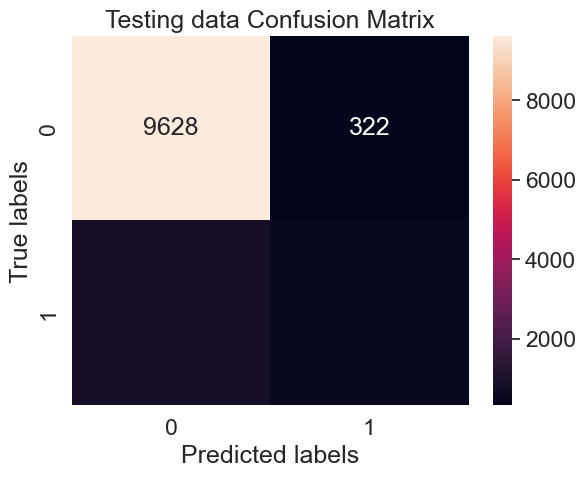

In [61]:
from sklearn.ensemble import  GradientBoostingClassifier
gbc_tuned = GradientBoostingClassifier(learning_rate= 0.1, max_depth= 5, n_estimators= 50)
gbc_tuned.fit(X_train, y_train)
## Performance Matrix on train data set
gbc_tuned_ypred_train = gbc_tuned.predict(X_train)
gbc_tuned_train_score = gbc_tuned.score(X_train, y_train) ## Accuracy
print("Training Accuracy : ",gbc_tuned_train_score)
print("Confusion matrix")
print(metrics.confusion_matrix(y_train, gbc_tuned_ypred_train))  ## confusion_matrix
print(metrics.classification_report(y_train, gbc_tuned_ypred_train))## classification_report
## Performance Matrix on test data set
gbc_tuned_ypred_test = gbc_tuned.predict(X_test)
gbc_tuned_test_score = gbc_tuned.score(X_test, y_test)
print("Testing Accuracy : ",gbc_tuned_test_score)
print("Confusion matrix")
print(metrics.confusion_matrix(y_test, gbc_tuned_ypred_test))
print(metrics.classification_report(y_test, gbc_tuned_ypred_test))

# Example confusion matrix (replace with your actual values)
gbc_tuned_trainconf =metrics.confusion_matrix(y_train, gbc_tuned_ypred_train)
# Plot the confusion matrix
ax = plt.subplot()
sns.heatmap(gbc_tuned_trainconf, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Training data Confusion Matrix')
plt.show()
# Example confusion matrix (replace with your actual values)
gbc_tuned_testconf =metrics.confusion_matrix(y_test, gbc_tuned_ypred_test)
# Plot the confusion matrix
ax = plt.subplot()
sns.heatmap(gbc_tuned_testconf, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Testing data Confusion Matrix')
plt.show()


AUC: 0.921
AUC: 0.902


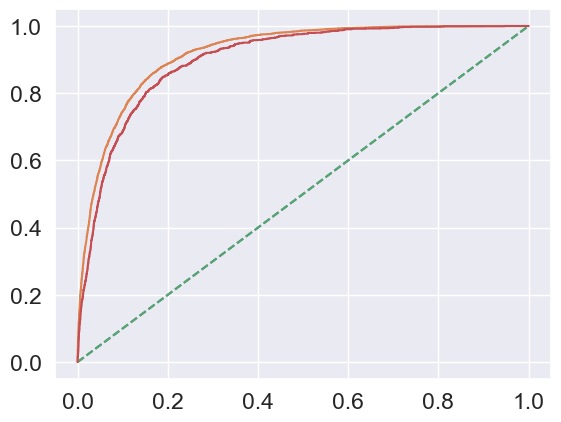

In [62]:
#AUC AND ROC GRAPH FOR TRAIN DATA
# predict probabilities
probs = gbc_tuned.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
#AUC AND ROC GRAPH FOR TEST DATA
# predict probabilities
probs = gbc_tuned.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### GB Classifier with smote

Accuracy on training set :  0.89
[[26110  3862]
 [ 2464 27508]]
              precision    recall  f1-score   support

           0       0.91      0.87      0.89     29972
           1       0.88      0.92      0.90     29972

    accuracy                           0.89     59944
   macro avg       0.90      0.89      0.89     59944
weighted avg       0.90      0.89      0.89     59944

AUC: 0.963


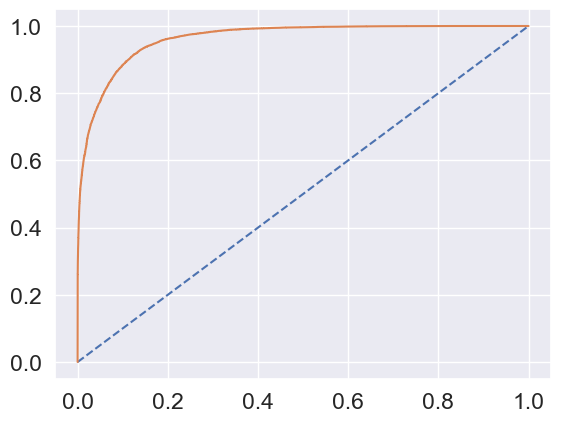

In [63]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
gbsmote = GradientBoostingClassifier()
gbsmote.fit(X_train_res, y_train_res)
## Performance Matrix on train data set
gbsmote_ypredtrain = gbsmote.predict(X_train_res)
print("Accuracy on training set : ",round(gbsmote.score(X_train_res, y_train_res),2))
print(metrics.confusion_matrix(y_train_res, gbsmote_ypredtrain))
print(metrics.classification_report(y_train_res, gbsmote_ypredtrain))
#AUC AND ROC GRAPH FOR TRAIN DATA
# predict probabilities
probs = gbsmote.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### two ensemble models performance report

In [75]:

model_performance = {'model_name': ['Random Forest Classifier','Tuning Random Forest','tuning Random Forest with gridsearchcv',
                                    'Random Forest with smote','Gradient Boosting Classifier','Tuning Gradient Boosting Classifier',
                                   'tuning Gradient Boosting Classifier with gridsearchcv','GB Classifier with smote'],
    'Training Accuracy':['100','88.91','93.94','91','90.37','91.64','91','89'],
    'Testing Accuracy':['90','88.57','89.49','0','89.79','89.49','89.63','0'],
    'Training AUC':['100','89.5','96.3','97.6','91.1','92.9','92.1','96.3'],
    'Testing AUC':['89','88.4','89.8','0','90.1','90.2','90.2','0'],
    'add':['0','0','0','0','0','0','0','0']}


In [76]:
All_models2 = pd.DataFrame(model_performance)
All_models2.sort_values(by='Testing Accuracy')

,model_name,Training Accuracy,Testing Accuracy,Training AUC,Testing AUC,add
3,Random Forest with smote,91,0,97.6,0,0
7,GB Classifier with smote,89,0,96.3,0,0
1,Tuning Random Forest,88.91,88.57,89.5,88.4,0
2,tuning Random Forest with gridsearchcv,93.94,89.49,96.3,89.8,0
5,Tuning Gradient Boosting Classifier,91.64,89.49,92.9,90.2,0
6,tuning Gradient Boosting Classifier with grids...,91,89.63,92.1,90.2,0
4,Gradient Boosting Classifier,90.37,89.79,91.1,90.1,0
0,Random Forest Classifier,100,90,100,89,0


## 4. Compare the performance of the three models (Q1 and Q3), explain which model is good and why.


In [79]:
# Concatenate vertically
result = pd.concat([All_models, All_models2])
result.sort_values(by='Testing Accuracy')

,model_name,Training Accuracy,Testing Accuracy,Training AUC,Testing AUC,add
3,SMOTE Logistic Regression,79,0,86.8,0,0
4,LR smote grcv,79,0,86.8,0,0
3,Random Forest with smote,91,0,97.6,0,0
7,GB Classifier with smote,89,0,96.3,0,0
0,Logistic Regression model,89,88,86.9,86.8,0
1,Logistic Regression model tuning,89,88,86.9,86.8,0
2,GridSearchCV for Logistic Regression,89,88,86.9,86.8,0
1,Tuning Random Forest,88.91,88.57,89.5,88.4,0
2,tuning Random Forest with gridsearchcv,93.94,89.49,96.3,89.8,0
5,Tuning Gradient Boosting Classifier,91.64,89.49,92.9,90.2,0


Gradient Boosting Classifier has performed well in all three models because its training and testing accuracy difference is less and also high in all models means it has less error or noise 